<a href="https://colab.research.google.com/github/ShiwenMahajuhck/AI-Assignment/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = '/content/ai4i+2020+predictive+maintenance+dataset.zip'
extract_dir = '/content/'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Unzipped {zip_path} to {extract_dir}")

# List contents of the extracted directory to verify
print("Contents of the extracted directory:")
!ls {extract_dir}

Unzipped /content/ai4i+2020+predictive+maintenance+dataset.zip to /content/
Contents of the extracted directory:
ai4i2020.csv  ai4i+2020+predictive+maintenance+dataset.zip  sample_data


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/ai4i2020.csv')
print("Dataset loaded successfully.")

# 3. Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# 4. Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# 5. Generate descriptive statistics of the numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# 6. Check for missing values
print("\nMissing Values per column:")
print(df.isnull().sum())

# 7. Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# 8. Description of features and target variable
print("\nFeature Description:")
print("Product ID: Unique identifier for each product.\n"\
      "Type: Type of product (L, M, H - Low, Medium, High quality/variant).\n"\
      "Air temperature [K]: Air temperature in Kelvin.\n"\
      "Process temperature [K]: Process temperature in Kelvin.\n"\
      "Rotational speed [rpm]: Rotational speed of the machine in RPM.\n"\
      "Torque [Nm]: Torque applied to the machine in Newton-meters.\n"\
      "Tool wear [min]: Tool wear time in minutes.\n"\
      "Machine failure: Binary indicator (0=No Failure, 1=Failure). This is the primary target variable for predictive maintenance classification.\n"\
      "TWF (Tool Wear Failure): Binary indicator (0=No, 1=Yes).\n"\
      "HDF (Heat Dissipation Failure): Binary indicator (0=No, 1=Yes).\n"\
      "PWF (Power Failure): Binary indicator (0=No, 1=Yes).\n"\
      "OSF (Overstrain Failure): Binary indicator (0=No, 1=Yes).\n"\
      "RNF (Random Failures): Binary indicator (0=No, 1=Yes).\n")
print("The dataset's primary target variable for predictive maintenance is 'Machine failure', which is a binary classification target. While the prompt mentioned a 'continuous target variable', this dataset predominantly provides binary failure indicators. Other binary columns (TWF, HDF, PWF, OSF, RNF) represent specific failure modes.")

# 9-10. Formulate and answer 2-3 analytical questions
print("\n--- Analytical Questions and Answers ---")

# Question 1: What is the distribution of different product types in the dataset?
print("\nQ1: What is the distribution of different product types in the dataset?")
print(df['Type'].value_counts())

# Question 2: What are the average Air and Process temperatures when a machine failure occurs versus when it does not?
print("\nQ2: What are the average Air and Process temperatures when a machine failure occurs versus when it does not?")
print(df.groupby('Machine failure')[['Air temperature [K]', 'Process temperature [K]']].mean())

# Question 3: What is the average Tool Wear when different specific failure types occur compared to no failure?
print("\nQ3: What is the average Tool Wear when different specific failure types occur compared to no failure?")
# Create a column for 'any specific failure' to compare with 'no failure'
df['Any_Specific_Failure'] = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].any(axis=1).astype(int)
print(df.groupby('Any_Specific_Failure')['Tool wear [min]'].mean())


Dataset loaded successfully.

First 5 rows of the DataFrame:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  R

In [ ]:
print("Original DataFrame shape:", df.shape)

# Remove specified columns
df = df.drop(columns=['UDI', 'Product ID', 'Any_Specific_Failure'])

print("DataFrame shape after removing 'UDI', 'Product ID', and 'Any_Specific_Failure':", df.shape)
print("Columns after removal:", df.columns.tolist())

Original DataFrame shape: (10000, 15)
DataFrame shape after removing 'UDI', 'Product ID', and 'Any_Specific_Failure': (10000, 12)
Columns after removal: ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [ ]:
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Identify categorical and numerical columns in X
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

print("\nCategorical columns:", categorical_cols.tolist())
print("Numerical columns:", numerical_cols.tolist())

Features (X) shape: (10000, 11)
Target (y) shape: (10000,)

Categorical columns: ['Type']
Numerical columns: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoding to categorical features
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = one_hot_encoder.fit_transform(X[categorical_cols])

# Create a DataFrame from the encoded features with appropriate column names
encoded_feature_names = one_hot_encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=X.index)

# Drop the original categorical columns and concatenate the encoded ones
X = X.drop(columns=categorical_cols)
X = pd.concat([X, X_encoded], axis=1)

print("X shape after one-hot encoding:", X.shape)
print("First 5 rows of X after one-hot encoding:")
print(X.head())

X shape after one-hot encoding: (10000, 13)
First 5 rows of X after one-hot encoding:
   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                298.1                    308.6                    1551   
1                298.2                    308.7                    1408   
2                298.1                    308.5                    1498   
3                298.2                    308.6                    1433   
4                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  RNF  Type_H  Type_L  \
0         42.8                0    0    0    0    0    0     0.0     0.0   
1         46.3                3    0    0    0    0    0     0.0     1.0   
2         49.4                5    0    0    0    0    0     0.0     1.0   
3         39.5                7    0    0    0    0    0     0.0     1.0   
4         40.0                9    0    0    0    0    0     0.0     1.0   

   Typ

In [ ]:
from sklearn.preprocessing import StandardScaler

# Re-identify numerical columns in X after one-hot encoding
# The binary failure indicators (TWF, HDF, PWF, OSF, RNF) are also numerical but often treated differently from continuous features.
# For now, we will scale all numerical columns identified from the original numerical_cols list
# and then concatenate with the one-hot encoded 'Type' features.

# Identify numerical columns for scaling. These are the original numerical_cols from before one-hot encoding.
# Note: After one-hot encoding, 'X' contains the original numerical columns and the new one-hot encoded 'Type' columns.
# The one-hot encoded 'Type' columns are binary (0/1) and don't typically need scaling, but the prompt says 'all numerical features'.
# Let's consider the continuous-like features as the ones to scale.

# Columns that represent continuous numerical data that should be scaled
continuous_numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Columns that are binary and do not need scaling (already 0 or 1)
binary_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Create a scaler object
scaler = StandardScaler()

# Apply scaling to continuous numerical features
X_scaled_continuous = scaler.fit_transform(X[continuous_numerical_cols])

# Create a DataFrame from the scaled features with original column names
X_scaled_continuous_df = pd.DataFrame(X_scaled_continuous, columns=continuous_numerical_cols, index=X.index)

# Combine scaled continuous features, unscaled binary features, and one-hot encoded categorical features
X_processed = pd.concat([X_scaled_continuous_df, X[binary_cols], X_encoded], axis=1)

# Update X to be the fully processed feature set
X = X_processed

print("X shape after scaling numerical features and combining:", X.shape)
print("First 5 rows of X after scaling:")
print(X.head())

X shape after scaling numerical features and combining: (10000, 13)
First 5 rows of X after scaling:
   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0            -0.952389                -0.947360                0.068185   
1            -0.902393                -0.879959               -0.729472   
2            -0.952389                -1.014761               -0.227450   
3            -0.902393                -0.947360               -0.590021   
4            -0.902393                -0.879959               -0.729472   

   Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  RNF  Type_H  Type_L  \
0     0.282200        -1.695984    0    0    0    0    0     0.0     0.0   
1     0.633308        -1.648852    0    0    0    0    0     0.0     1.0   
2     0.944290        -1.617430    0    0    0    0    0     0.0     1.0   
3    -0.048845        -1.586009    0    0    0    0    0     0.0     1.0   
4     0.001313        -1.554588    0    0    0    0    0     0.0    

Generating histograms for original numerical features...


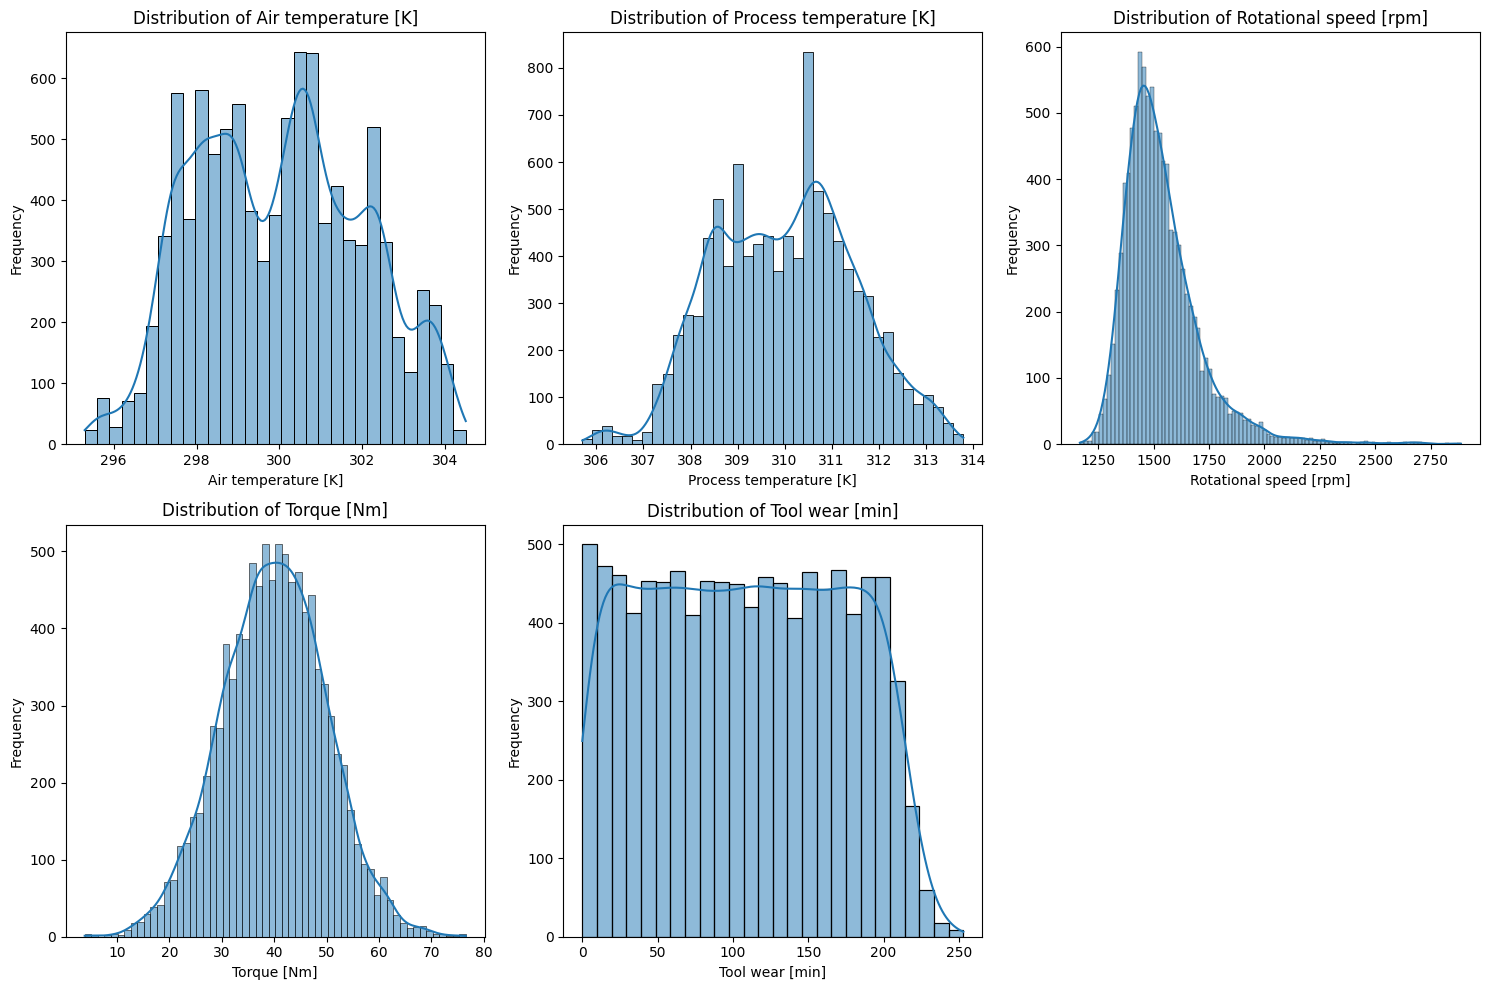

Histograms generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the original (unscaled) numerical features for visualization
# Re-load df from before processing to get original numerical values
# The original numerical columns were stored in `continuous_numerical_cols` list in the previous step.

# To get the original unscaled values for plotting, we should use the `df` DataFrame before scaling.
# Based on the kernel state, `df` still holds the data after dropping 'UDI', 'Product ID', 'Any_Specific_Failure'
# and before one-hot encoding or scaling. So we can extract the continuous numerical columns directly from `df`.

# Let's re-identify the numerical columns that were originally in the dataframe (before scaling)
# from the `df` dataframe that was current before the scaling step.
# I will use the `continuous_numerical_cols` variable defined previously.

print("Generating histograms for original numerical features...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Histograms generated.")

Generating box plots for original numerical features to visualize outliers...


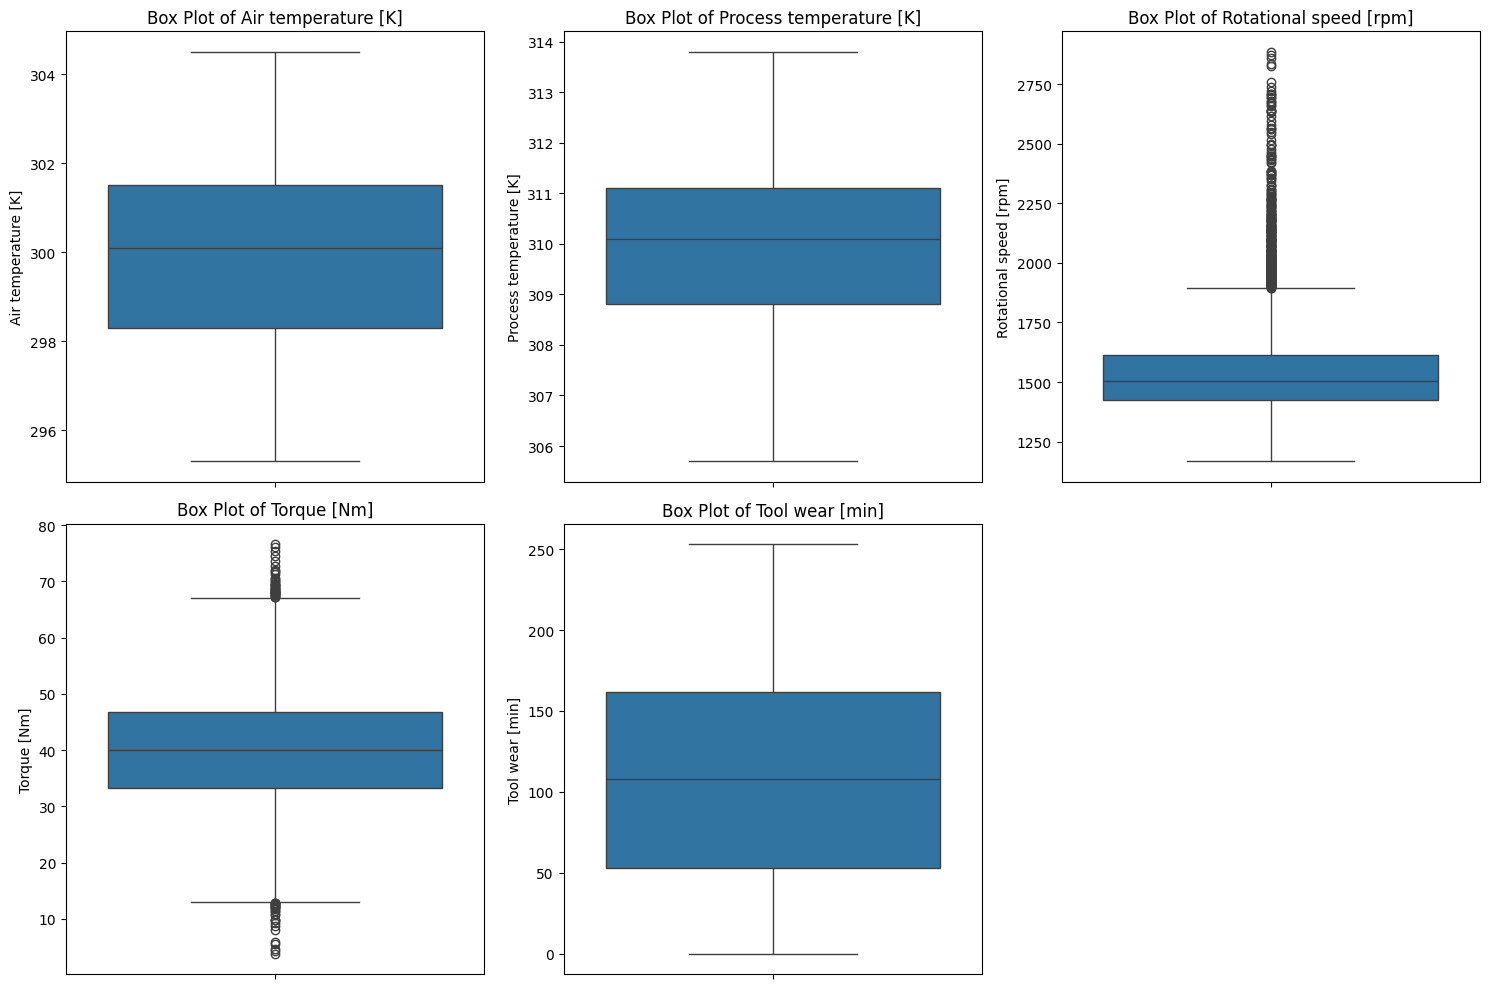

Box plots generated.


In [ ]:
print("Generating box plots for original numerical features to visualize outliers...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()
print("Box plots generated.")

Generating correlation matrix heatmap for original numerical features...


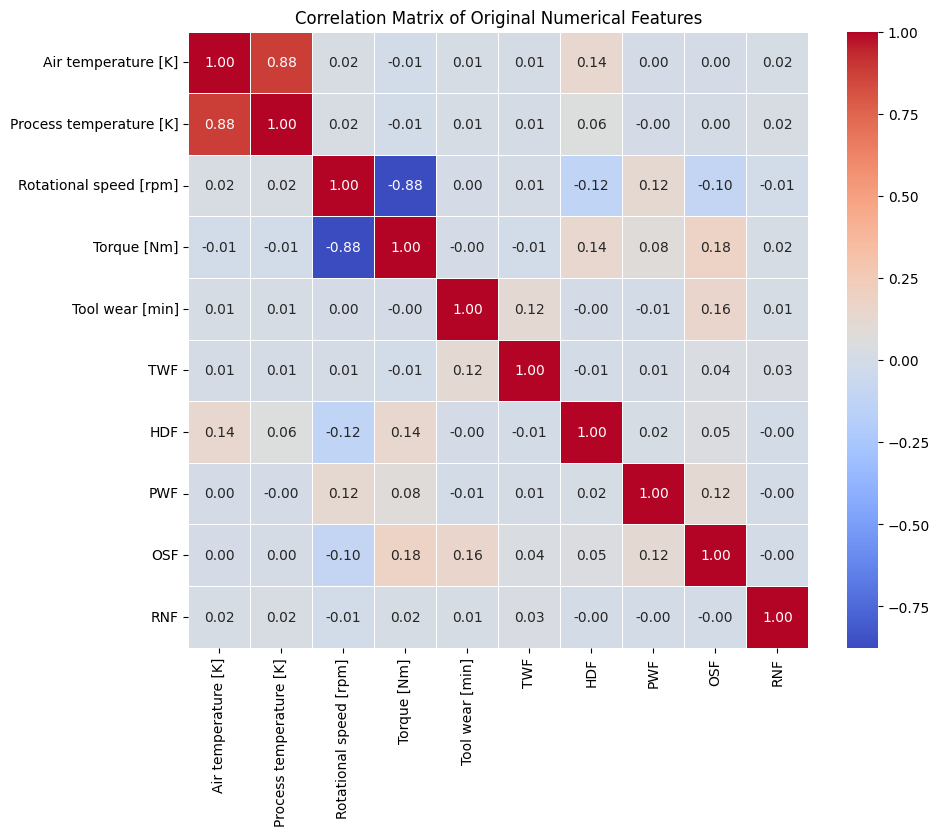

Correlation matrix heatmap generated.


In [ ]:
print("Generating correlation matrix heatmap for original numerical features...")

# Re-identify all numerical columns from the original df for correlation
# Note: `df` currently contains original numerical features + Type column, Machine failure + binary failure indicators.
# We need to select only the numerical features that are relevant for correlation analysis among themselves.
# `continuous_numerical_cols` already stores the continuous features and `binary_cols` stores the binary features.

all_numerical_features_for_corr = continuous_numerical_cols + binary_cols

# Compute the correlation matrix for these numerical features from the 'df' DataFrame
correlation_matrix = df[all_numerical_features_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Original Numerical Features')
plt.show()
print("Correlation matrix heatmap generated.")

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets.
X_train shape: (8000, 13)
X_test shape: (2000, 13)
y_train shape: (8000,)
y_test shape: (2000,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

# Ensure y_train is in the correct format for regression (float32)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# 3. Create a Sequential model for the MLP
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    Dense(64, activation='relu'), # Hidden layer
    Dense(32, activation='relu'), # Hidden layer
    Dense(1, activation='linear') # Output layer for regression
])

# 5. Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[MeanSquaredError(), MeanAbsoluteError()]
)

print("MLP Model Architecture:")
model.summary()

# 6. Train the model
history = model.fit(
    X_train, y_train,
    epochs=50, # A reasonable number of epochs
    batch_size=32,
    validation_split=0.2, # Use 20% of training data for validation
    verbose=0 # Suppress verbose output during training for cleaner logs
)

print("Model training complete. Loss and metrics history available.")

# To see the last epoch's training and validation metrics:
print("\nLast epoch training metrics:")
print(f"Loss: {history.history['loss'][-1]:.4f}")
print(f"Mean Squared Error: {history.history['mean_squared_error'][-1]:.4f}")
print(f"Mean Absolute Error: {history.history['mean_absolute_error'][-1]:.4f}")

print("\nLast epoch validation metrics:")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Validation Mean Squared Error: {history.history['val_mean_squared_error'][-1]:.4f}")
print(f"Validation Mean Absolute Error: {history.history['val_mean_absolute_error'][-1]:.4f}")

MLP Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

Model training complete. Loss and metrics history available.

Last epoch training metrics:
Loss: 0.0006
Mean Squared Error: 0.0006
Mean Absolute Error: 0.0034

Last epoch validation metrics:
Validation Loss: 0.0021
Validation Mean Squared Error: 0.0021
Validation Mean Absolute Error: 0.0092


In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# 7. Evaluate the trained model on the test set
print("\nEvaluating model on the test set...")
loss, mse, mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Mean Squared Error (MSE): {mse:.4f}")
print(f"Test Mean Absolute Error (MAE): {mae:.4f}")

# 8. Calculate RMSE and R2 score
rmse = np.sqrt(mse)
print(f"Test Root Mean Squared Error (RMSE): {rmse:.4f}")

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Test R-squared (R2) Score: {r2:.4f}")


Evaluating model on the test set...
Test Loss: 0.0013
Test Mean Squared Error (MSE): 0.0013
Test Mean Absolute Error (MAE): 0.0086
Test Root Mean Squared Error (RMSE): 0.0354
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test R-squared (R2) Score: 0.9575


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("--- Linear Regression Model ---")

# Instantiate and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
print("Linear Regression model trained.")

# Make predictions with Linear Regression
y_pred_lr = linear_reg_model.predict(X_test)

# Evaluate Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.4f}")
print(f"Linear Regression - MSE: {mse_lr:.4f}")
print(f"Linear Regression - RMSE: {rmse_lr:.4f}")
print(f"Linear Regression - R2 Score: {r2_lr:.4f}")

print("\n--- Random Forest Regressor Model ---")

# Instantiate and train Random Forest Regressor model
# Using a small n_estimators for quick execution, can be tuned later
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

# Make predictions with Random Forest Regressor
y_pred_rf = rf_reg_model.predict(X_test)

# Evaluate Random Forest Regressor model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MAE: {mae_rf:.4f}")
print(f"Random Forest Regressor - MSE: {mse_rf:.4f}")
print(f"Random Forest Regressor - RMSE: {rmse_rf:.4f}")
print(f"Random Forest Regressor - R2 Score: {r2_rf:.4f}")

--- Linear Regression Model ---
Linear Regression model trained.
Linear Regression - MAE: 0.0094
Linear Regression - MSE: 0.0033
Linear Regression - RMSE: 0.0574
Linear Regression - R2 Score: 0.8886

--- Random Forest Regressor Model ---
Random Forest Regressor model trained.
Random Forest Regressor - MAE: 0.0029
Random Forest Regressor - MSE: 0.0012
Random Forest Regressor - RMSE: 0.0347
Random Forest Regressor - R2 Score: 0.9593


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

print("--- Hyperparameter Optimization for Random Forest Regressor ---")

# Define the parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_depth': [None, 10, 20], # Maximum number of levels in a tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# Instantiate GridSearchCV with RandomForestRegressor
# Use n_jobs=-1 to utilize all available CPU cores for faster execution
# verbose=2 to see progress during the fitting process
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=3, # Using a smaller CV value for quicker execution, can be increased to 5 for more robustness
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for Random Forest Regressor...")
grid_search_rf.fit(X_train, y_train)
print("GridSearchCV for Random Forest Regressor completed.")

# Print the best parameters and best R2 score found
print("\nBest parameters for Random Forest Regressor:", grid_search_rf.best_params_)
print("Best R2 score for Random Forest Regressor (from cross-validation):", grid_search_rf.best_score_)

--- Hyperparameter Optimization for Random Forest Regressor ---
Starting GridSearchCV for Random Forest Regressor...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
GridSearchCV for Random Forest Regressor completed.

Best parameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best R2 score for Random Forest Regressor (from cross-validation): 0.9728535317655882


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Access the best estimator from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_
print("Best Random Forest Regressor from GridSearchCV accessed.")

# Extract feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances (sorted descending):")
print(features_df)

Best Random Forest Regressor from GridSearchCV accessed.

Feature Importances (sorted descending):
                    Feature  Importance
6                       HDF    0.351145
7                       PWF    0.259043
8                       OSF    0.256671
5                       TWF    0.125969
3               Torque [Nm]    0.002473
4           Tool wear [min]    0.001796
2    Rotational speed [rpm]    0.001268
0       Air temperature [K]    0.000757
1   Process temperature [K]    0.000602
12                   Type_M    0.000152
11                   Type_L    0.000075
10                   Type_H    0.000048
9                       RNF    0.000000


Generating bar plot for feature importances...


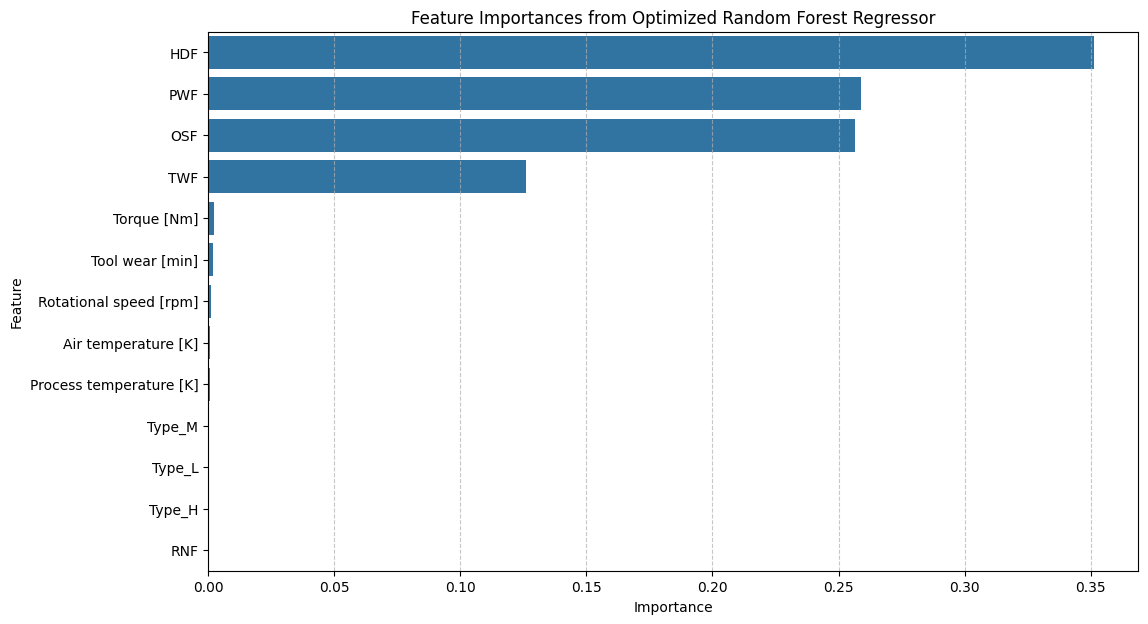

Feature importances bar plot generated.


In [ ]:
print("Generating bar plot for feature importances...")

plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances from Optimized Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print("Feature importances bar plot generated.")

In [ ]:
import numpy as np

# Decide on a threshold or number of top features to keep.
# Observing the feature importances, there is a clear distinction between the top 4 failure type indicators and the rest.
# We will select features with importance greater than a small threshold, or simply select the top N features.
# Let's select features with importance > 0.001 as an example threshold.
# Alternatively, we can pick the top 5 or top 6 features.
# For now, let's select features with importance > 0.001 as a pragmatic choice, which includes HDF, PWF, OSF, TWF, Torque [Nm], Tool wear [min], Rotational speed [rpm].

selected_features_names = features_df[features_df['Importance'] > 0.001]['Feature'].tolist()

print("Selected features based on importance threshold (>0.001):")
print(selected_features_names)

# Create new training and testing datasets with only the selected features
X_train_selected = X_train[selected_features_names]
X_test_selected = X_test[selected_features_names]

print(f"\nX_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")
print("New training and testing datasets created with selected features.")

Selected features based on importance threshold (>0.001):
['HDF', 'PWF', 'OSF', 'TWF', 'Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]']

X_train_selected shape: (8000, 7)
X_test_selected shape: (2000, 7)
New training and testing datasets created with selected features.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- 1. Retrain Linear Regression with Selected Features ---
print("--- Retraining Linear Regression with Selected Features ---")
# Instantiate a LinearRegression model
linear_reg_selected_model = LinearRegression()

# Train this model using X_train_selected and y_train
linear_reg_selected_model.fit(X_train_selected, y_train)
print("Linear Regression (selected features) model trained.")

# Make predictions on X_test_selected
y_pred_lr_selected = linear_reg_selected_model.predict(X_test_selected)

# Calculate and store the MAE, MSE, RMSE, and R2 score
mae_lr_selected = mean_absolute_error(y_test, y_pred_lr_selected)
mse_lr_selected = mean_squared_error(y_test, y_pred_lr_selected)
rmse_lr_selected = np.sqrt(mse_lr_selected)
r2_lr_selected = r2_score(y_test, y_pred_lr_selected)

print(f"Linear Regression (Selected Features) - MAE: {mae_lr_selected:.4f}")
print(f"Linear Regression (Selected Features) - MSE: {mse_lr_selected:.4f}")
print(f"Linear Regression (Selected Features) - RMSE: {rmse_lr_selected:.4f}")
print(f"Linear Regression (Selected Features) - R2 Score: {r2_lr_selected:.4f}")

# --- 2. Retrain Optimized Random Forest with Selected Features ---
print(
    "\n--- Retraining Optimized Random Forest with Selected Features ---"
)
# Access the best estimator from the grid_search_rf object
best_rf_model_selected = grid_search_rf.best_estimator_

# Train this best estimator using X_train_selected and y_train
best_rf_model_selected.fit(X_train_selected, y_train)
print("Optimized Random Forest (selected features) model trained.")

# Make predictions on X_test_selected
y_pred_rf_selected = best_rf_model_selected.predict(X_test_selected)

# Calculate and store the MAE, MSE, RMSE, and R2 score
mae_rf_selected = mean_absolute_error(y_test, y_pred_rf_selected)
mse_rf_selected = mean_squared_error(y_test, y_pred_rf_selected)
rmse_rf_selected = np.sqrt(mse_rf_selected)
r2_rf_selected = r2_score(y_test, y_pred_rf_selected)

# Retrieve cross-validation R2 score
cv_r2_rf_optimized = grid_search_rf.best_score_

print(f"Optimized Random Forest (Selected Features) - MAE: {mae_rf_selected:.4f}")
print(f"Optimized Random Forest (Selected Features) - MSE: {mse_rf_selected:.4f}")
print(f"Optimized Random Forest (Selected Features) - RMSE: {rmse_rf_selected:.4f}")
print(f"Optimized Random Forest (Selected Features) - R2 Score: {r2_rf_selected:.4f}")
print(f"Optimized Random Forest (Selected Features) - CV R2 Score: {cv_r2_rf_optimized:.4f}")


--- Retraining Linear Regression with Selected Features ---
Linear Regression (selected features) model trained.
Linear Regression (Selected Features) - MAE: 0.0092
Linear Regression (Selected Features) - MSE: 0.0033
Linear Regression (Selected Features) - RMSE: 0.0574
Linear Regression (Selected Features) - R2 Score: 0.8888

--- Retraining Optimized Random Forest with Selected Features ---
Optimized Random Forest (selected features) model trained.
Optimized Random Forest (Selected Features) - MAE: 0.0024
Optimized Random Forest (Selected Features) - MSE: 0.0011
Optimized Random Forest (Selected Features) - RMSE: 0.0329
Optimized Random Forest (Selected Features) - R2 Score: 0.9634
Optimized Random Forest (Selected Features) - CV R2 Score: 0.9729


In [ ]:
import pandas as pd

# --- 3. Collect Neural Network Performance ---
# Metrics for the Neural Network model were stored in `mae`, `mse`, `rmse`, `r2`.
# Retrieve them directly.

# --- 4. Create Comparison Table ---
print("\n--- Model Performance Comparison ---")

# Create a list of dictionaries to hold model performance metrics
performance_data = []

# Neural Network metrics
performance_data.append({
    'Model': 'Neural Network',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2 Score': r2,
    'Cross-Validation R2 Score': 'N/A' # Not applicable for single run evaluation
})

# Linear Regression with Selected Features metrics
performance_data.append({
    'Model': 'Linear Regression (Selected Features)',
    'MAE': mae_lr_selected,
    'MSE': mse_lr_selected,
    'RMSE': rmse_lr_selected,
    'R2 Score': r2_lr_selected,
    'Cross-Validation R2 Score': 'N/A'
})

# Optimized Random Forest with Selected Features metrics
performance_data.append({
    'Model': 'Optimized Random Forest (Selected Features)',
    'MAE': mae_rf_selected,
    'MSE': mse_rf_selected,
    'RMSE': rmse_rf_selected,
    'R2 Score': r2_rf_selected,
    'Cross-Validation R2 Score': cv_r2_rf_optimized
})

# Create a pandas DataFrame from the performance data
comparison_df = pd.DataFrame(performance_data)

# Display the comparison table, formatted for readability
print(comparison_df.round(4).to_markdown(index=False))
print("\nModel comparison table generated.")


--- Model Performance Comparison ---
| Model                                       |    MAE |    MSE |   RMSE |   R2 Score | Cross-Validation R2 Score   |
|:--------------------------------------------|-------:|-------:|-------:|-----------:|:----------------------------|
| Neural Network                              | 0.0086 | 0.0013 | 0.0354 |     0.9575 | N/A                         |
| Linear Regression (Selected Features)       | 0.0092 | 0.0033 | 0.0574 |     0.8888 | N/A                         |
| Optimized Random Forest (Selected Features) | 0.0024 | 0.0011 | 0.0329 |     0.9634 | 0.9728535317655882          |

Model comparison table generated.
